In [26]:
%matplotlib inline
import requests
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import json
import csv
import nbashots as nba

In [27]:
# Load the json file into a  pandas dataframe.

# Traditional method from assignments did not work, did what this link has
# instead.

# https://stackoverflow.com/questions/42705228/how-to-read-these-json-files

with open('shotchartdetail2016-2017.json') as data_file:
   shot_attempts = data_file.read()    
   try:
       shot_data = json.loads(shot_attempts)
   except ValueError:
       print('Failed:')  

In [28]:
# Get the headers so we can use them as column headers for the Data Frame
headers = shot_data['resultSets'][0]['headers']

# Get shot chart data
shots = shot_data['resultSets'][0]['rowSet']

#print(headers)
#print(shots)

In [29]:
# Add 'shots' to our DataFrame
df_shots = pd.DataFrame(shots, columns=headers)

# View the catgories of the data 
from IPython.display import display
with pd.option_context('display.max_columns', None):
    display(df_shots.head())

,GRID_TYPE,GAME_ID,GAME_EVENT_ID,PLAYER_ID,PLAYER_NAME,TEAM_ID,TEAM_NAME,PERIOD,MINUTES_REMAINING,SECONDS_REMAINING,EVENT_TYPE,ACTION_TYPE,SHOT_TYPE,SHOT_ZONE_BASIC,SHOT_ZONE_AREA,SHOT_ZONE_RANGE,SHOT_DISTANCE,LOC_X,LOC_Y,SHOT_ATTEMPTED_FLAG,SHOT_MADE_FLAG,GAME_DATE,HTM,VTM
0,Shot Chart Detail,0021600003,19,201939,Stephen Curry,1610612744,Golden State Warriors,1,9,2,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,28,130,257,1,0,20161025,GSW,SAS
1,Shot Chart Detail,0021600003,28,201939,Stephen Curry,1610612744,Golden State Warriors,1,8,6,Made Shot,Step Back Jump shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,25,189,174,1,1,20161025,GSW,SAS
2,Shot Chart Detail,0021600003,88,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,23,Missed Shot,Jump Shot,3PT Field Goal,Above the Break 3,Right Side Center(RC),24+ ft.,27,159,229,1,0,20161025,GSW,SAS
3,Shot Chart Detail,0021600003,91,201939,Stephen Curry,1610612744,Golden State Warriors,1,2,1,Missed Shot,Jump Shot,2PT Field Goal,Mid-Range,Right Side Center(RC),16-24 ft.,21,163,141,1,0,20161025,GSW,SAS
4,Shot Chart Detail,0021600003,184,201939,Stephen Curry,1610612744,Golden State Warriors,2,6,47,Made Shot,Jump Shot,3PT Field Goal,Above the Break 3,Center(C),24+ ft.,26,-9,267,1,1,20161025,GSW,SAS


In [30]:
print(df_shots)

              GRID_TYPE     GAME_ID  GAME_EVENT_ID  PLAYER_ID    PLAYER_NAME  \
0     Shot Chart Detail  0021600003             19     201939  Stephen Curry   
1     Shot Chart Detail  0021600003             28     201939  Stephen Curry   
2     Shot Chart Detail  0021600003             88     201939  Stephen Curry   
3     Shot Chart Detail  0021600003             91     201939  Stephen Curry   
4     Shot Chart Detail  0021600003            184     201939  Stephen Curry   
5     Shot Chart Detail  0021600003            206     201939  Stephen Curry   
6     Shot Chart Detail  0021600003            218     201939  Stephen Curry   
7     Shot Chart Detail  0021600003            223     201939  Stephen Curry   
8     Shot Chart Detail  0021600003            227     201939  Stephen Curry   
9     Shot Chart Detail  0021600003            289     201939  Stephen Curry   
10    Shot Chart Detail  0021600003            324     201939  Stephen Curry   
11    Shot Chart Detail  0021600003     

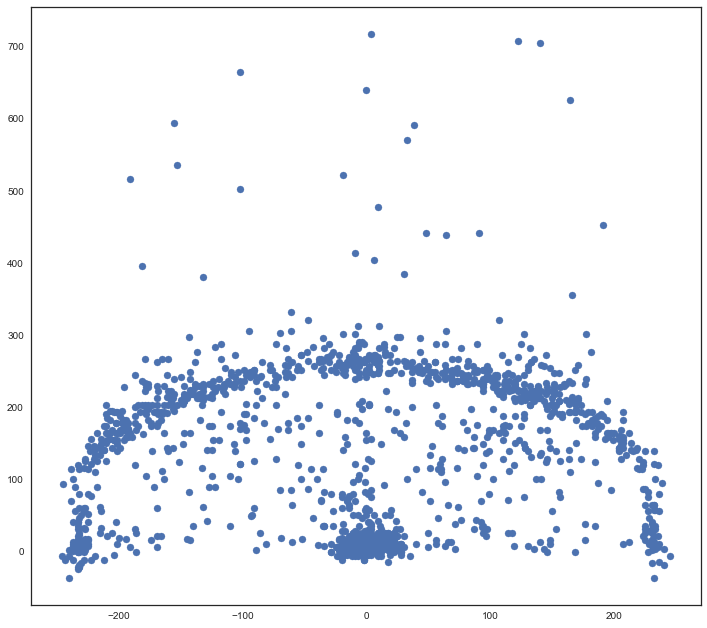

In [31]:
# The dataframe contains X and Y coordinates of Steph Curry's each and every shot in the 2016-17
# season. We are creating a visual representation using the "LOC X" and "LOC Y" columns.

sns.set_style("white")
sns.set_color_codes()
plt.figure(figsize=(12,11))
plt.scatter(df_shots.LOC_X, df_shots.LOC_Y)
plt.show()

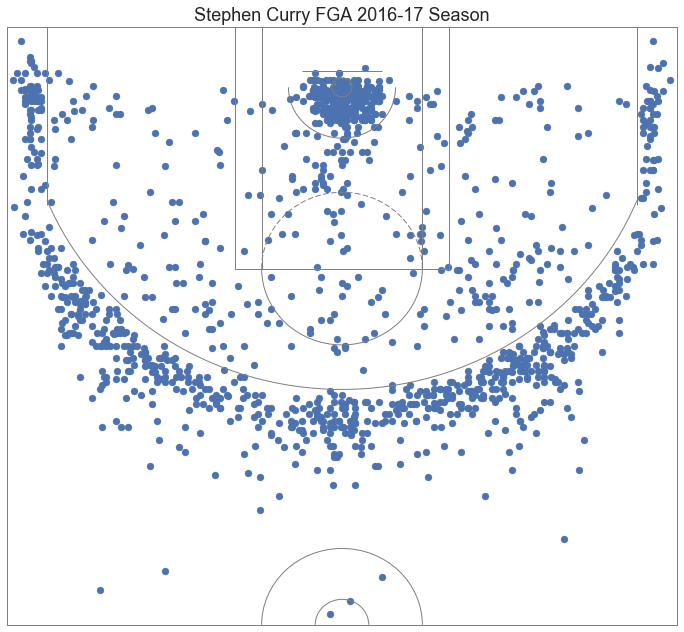

In [35]:
# Set the size for our plots
plt.rcParams['figure.figsize'] = (12, 11)

nba.shot_chart(df_shots.LOC_X, df_shots.LOC_Y,
              title="Stephen Curry FGA 2016-17 Season")

plt.show()